# This notebook provides the statistics of the datsets

In [1]:
%load_ext autoreload

In [2]:
%autoreload
import numpy as np
import pandas as pd
import sys
import os
import glob
import imageio
import time
from scipy import ndimage, signal
from cv2 import medianBlur

sys.path.append("..")

from PIL import Image
Image.MAX_IMAGE_PIXELS = 192000000000
from costum_arild.source.utils import image_processing_utils, gdal_utils
from costum_arild.source.data_processing import TrainingImage

2023-05-28 18:36:57.249673: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [19]:
# get number of all pixels
def get_num_pixels(count_list_tmp):
    pixel_count = 0
    for img_count in count_list_tmp:
        pixel_count += img_count.sum()
    return pixel_count

In [20]:
def class_count_list_dataframe(class_count_list, unknown_zero):
    class_df = pd.DataFrame(class_count_list, dtype='float32')

    class_df.loc['class_sum'] = class_df.sum(axis=0)

    if unknown_zero == True:
        class_df = class_df.rename(columns={5: "W", 1: "G", 2: "V", 3: "F", 4: "A", 0: "U"})
    else:
        class_df = class_df.rename(columns={0: "W", 1: "G", 2: "V", 3: "F", 4: "A", 5: "U"})

    class_df.loc['class_sum_percent'] = ((class_df.loc['class_sum'] / class_df.loc['class_sum'].sum()) * 100)
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    return class_df

In [4]:
dest_save = '/media/saeid/LaCie/Saeid/segmentation/dataset/neurips dataset/After_revision/ml_final_version/dataset_statistics'

# Statistics of dataset

### all images

In [36]:
new_dataset = None

In [6]:
all_label_path = '/media/saeid/LaCie/Saeid/segmentation/dataset/neurips dataset/After_revision/ml_final_version/full_images_together/all/label'

all_label_count = image_processing_utils.count_class_list_directory_2d(
    all_label_path, verbose=1)

all_label_count

working on label 33-2-462-208-23_g47.png
working on label 33-2-462-209-13_g47.png
working on label 33-2-462-210-32_g47.png
working on label 33-2-462-210-33_g47.png
working on label 33-2-462-212-31_g47.png
working on label 33-2-462-212-32_g47.png
working on label 33-2-462-212-33_g47.png
working on label 33-2-462-213-20_g47.png
working on label 33-2-462-213-30_g47.png
working on label 33-2-462-215-20_g47.png
working on label 33-2-462-215-30_g47.png
working on label 33-2-463-211-00_g47.png
working on label 33-2-463-211-01_g47.png
working on label 33-2-463-211-02_g47.png
working on label 33-2-463-212-00_g47.png
working on label 33-2-463-212-01_g47.png
working on label 33-2-463-213-01_g47.png
working on label 33-2-463-213-02_g47.png
working on label 33-2-463-214-00_g47.png
working on label 33-2-463-214-01_g47.png
working on label 33-2-463-214-02_g47.png
working on label 33-2-462-209-20_g47.png
working on label 33-2-462-211-30_g47.png
working on label 33-2-462-212-23_g47.png
working on label

[array([19232088.,  1793591., 15171455.,  9420568.,   706207.,  1676091.]),
 array([12874590.,  1940675., 13610700., 18085020.,   604257.,   884758.]),
 array([       0.,  1748544., 12911836., 29653640.,  2017066.,  1668914.]),
 array([  786408.,  5457934., 20758878., 16960116.,  1167348.,  2869316.]),
 array([ 4287753.,  2205864., 11171421., 27460835.,  1120599.,  1753528.]),
 array([6.3360000e+03, 4.0054190e+06, 1.0846545e+07, 2.8077644e+07,
        2.1006760e+06, 2.9633800e+06]),
 array([ 1862217.,  2455399.,  7010663., 32773178.,  1559935.,  2338608.]),
 array([       0.,   951943., 31745211., 13675668.,   589729.,  1037449.]),
 array([ 4962192.,  4525892., 15189376., 19779953.,   659913.,  2882674.]),
 array([ 9275781.,  6266312.,  2670218., 11890127.,   513818., 17383744.]),
 array([  177678.,  6341281., 15368740., 17418693.,  1107762.,  7585846.]),
 array([ 3235397.,   986334.,  9647675., 30886359.,  2051401.,  1192834.]),
 array([ 3644194.,  4796164.,  8480877., 27478084.,  170

In [51]:
class_col = ['G','V','F','A', 'W']

In [16]:
all_pixel_count = get_num_pixels(
    count_list_tmp=all_label_count)

In [17]:
print(f'HAIR 2023 contains {all_pixel_count} pixels')

HAIR 2023 contains 8674435200.0 pixels


In [18]:
print(f'This means we are {round(((8718936000)/(6867638784)) * 100, 2)}')

This means we are 126.96


#### draw some diagrams

In [24]:
all_pixel_count

8674435200.0

In [79]:
unknown_zero = True
all_class_df = class_count_list_dataframe(
    class_count_list=all_label_count, 
    unknown_zero=unknown_zero)

all_dataset = all_class_df.loc['class_sum_percent'].to_frame()
all_dataset = all_dataset.rename(columns={"class_sum_percent": "Dataset"})

all_class_df.loc['class_sum_percent'].to_frame()

,class_sum_percent
U,20.94
G,1.94
V,46.80
F,23.00
A,2.68
W,4.64


In [80]:
all_class_df[class_col].loc['class_sum'] / all_class_df[class_col].loc['class_sum'].sum()
# all_class_df

G   0.02
V   0.59
F   0.29
A   0.03
W   0.06
Name: class_sum, dtype: float32

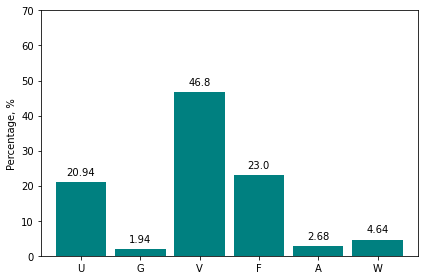

In [81]:
# all_class_df.loc['class_sum_percent'] = (all_class_df[class_col].loc['class_sum'] / all_class_df[class_col].loc['class_sum'].sum()) * 100
%matplotlib inline
import matplotlib.pyplot as plt

old_dataset = all_class_df.loc['class_sum_percent'].to_frame()
old_dataset = old_dataset.rename(columns={"class_sum_percent": "class percentage"})
plot = old_dataset.plot.bar(legend=False, color='teal', width=0.85)

for p in plot.patches:
    plot.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plot.set(ylabel="Percentage, %")

fig = plot.get_figure()
plot.set_ylim(0,70)
plt.xticks(rotation='horizontal')
fig.tight_layout()
fig.savefig( os.path.join(dest_save, 'dataset_statistics_percent.png'), dpi=600)

In [68]:
unkown_class_annotated = all_class_df[class_col].loc['class_sum'].sum()
print(f"Our dataset has {unkown_class_annotated} annotated images")

Our dataset has 6857922048.0 annotated images


In [69]:
print(f'This means we are {round(((unkown_class_annotated)/(6867638784)) * 100, 2)}')

This means we are 99.86


# Test sets (ID and OOD)

In [44]:
ood_label_path = '/media/saeid/LaCie/Saeid/segmentation/dataset/neurips dataset/After_revision/ml_final_version/full_images_together/ood/label'
id_label_path = '/media/saeid/LaCie/Saeid/segmentation/dataset/neurips dataset/After_revision/ml_final_version/full_images_together/testset/label'

id_label_count = image_processing_utils.count_class_list_directory_2d(
    id_label_path, verbose=0)

ood_label_count = image_processing_utils.count_class_list_directory_2d(
    ood_label_path, verbose=0)

ID

In [83]:
unknown_zero = True
id_class_df = class_count_list_dataframe(
    class_count_list=id_label_count, 
    unknown_zero=unknown_zero)

all_dataset = id_class_df.loc['class_sum_percent'].to_frame()
all_dataset = all_dataset.rename(columns={"class_sum_percent": "Dataset"})

id_class_df.loc['class_sum_percent'].to_frame()

,class_sum_percent
U,15.54
G,2.30
V,45.09
F,30.01
A,2.52
W,4.55


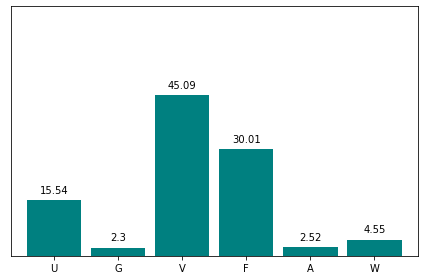

In [112]:
# id_class_df.loc['class_sum_percent'] = (id_class_df[class_col].loc['class_sum'] / id_class_df[class_col].loc['class_sum'].sum()) * 100
# id_class_df = id_class_df[class_col]
%matplotlib inline
import matplotlib.pyplot as plt

old_dataset = id_class_df.loc['class_sum_percent'].to_frame()
old_dataset = old_dataset.rename(columns={"class_sum_percent": "class percentage"})
plot = old_dataset.plot.bar(legend=False, color='teal', width=0.85)

for p in plot.patches:
    plot.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plot.set(ylabel="Percentage, %")

fig = plot.get_figure()
plot.set_ylim(0,70)
plt.xticks(rotation='horizontal')

# remove the y ticks
plt.yticks([])

fig.tight_layout()
fig.savefig( os.path.join(dest_save, 'id_statistics_percent.png'), dpi=600)

OOD

In [88]:
unknown_zero = True
ood_class_df = class_count_list_dataframe(
    class_count_list=ood_label_count, 
    unknown_zero=unknown_zero)

all_dataset = ood_class_df.loc['class_sum_percent'].to_frame()
all_dataset = all_dataset.rename(columns={"class_sum_percent": "Dataset"})

ood_class_df.loc['class_sum_percent'].to_frame()

,class_sum_percent
U,9.64
G,1.83
V,42.27
F,35.21
A,3.63
W,7.42


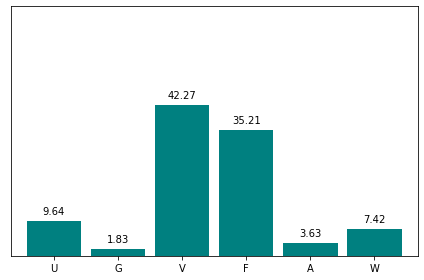

In [110]:
# ood_class_df.loc['class_sum_percent'] = (ood_class_df[class_col].loc['class_sum'] / ood_class_df[class_col].loc['class_sum'].sum()) * 100
# ood_class_df = ood_class_df[class_col]
%matplotlib inline
import matplotlib.pyplot as plt

old_dataset = ood_class_df.loc['class_sum_percent'].to_frame()
old_dataset = old_dataset.rename(columns={"class_sum_percent": "class percentage"})
plot = old_dataset.plot.bar(legend=False, color='teal', width=0.85)

for p in plot.patches:
    plot.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plot.set(ylabel="Percentage, %")

fig = plot.get_figure()
plot.set_ylim(0,70)
plt.xticks(rotation='horizontal')
# remove the y ticks
plt.yticks([])

fig.tight_layout()
fig.savefig( os.path.join(dest_save, 'ood_statistics_percent.png'), dpi=600)